In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

### 1. Dataset
Load the prostate dataset. 

In [5]:
train = pd.read_csv("data/prostate_train.csv")
test = pd.read_csv("data/prostate_test.csv") 

We will use the target $y=$lpsa throughout this exercise, and all other features as predictors $X$, so split the train and test sets by $X,y$.

In [25]:
Xtrain, ytrain = train.loc[:, train.columns != 'lpsa'], train['lpsa']
Xtest, ytest = test.loc[:, test.columns != 'lpsa'], test['lpsa']

### 2. Ridge Regression
Perform Ridge regression with target lpsa and all other features as predictors. Do so for different regularization parameters $\lambda$.
Plot the resulting coefficients depending on $\lambda$, as in ISLR, p.238, Fig. 6.4.

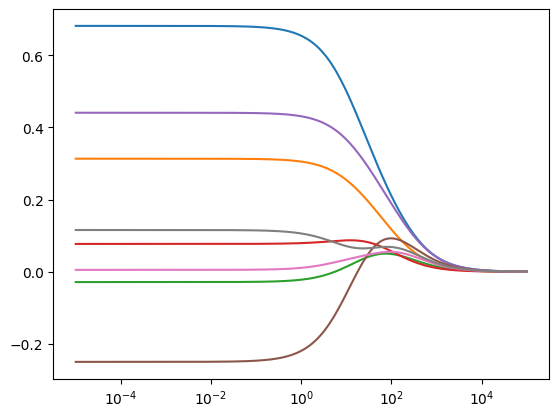

In [15]:
from sklearn.linear_model import Ridge  
    
# This is an example of possible values for the lambda that you can consider.
lambdas = np.logspace(-5, 5, 200)

coefs = []
for l in lambdas:
    model = Ridge(alpha=l)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
plt.figure()
plt.plot(lambdas, coefs)
plt.xscale("log")
plt.show()

As lambda increases, the coefficients all shrink to zero. However, some coefficients oscillate as the model uses them to replace the other shrunk coefficients.

### 3. Cross Validation & Ridge
Perform 10-fold cross-validation on the training set to determine the optimal value for $\lambda$ for the ridge regression model.

In [35]:
from sklearn.model_selection import KFold

# K-fold cross validation
folds = 10

kf = KFold(n_splits=folds)
errors = []
for l in lambdas:
    model = Ridge(alpha=l)
    error = 0
    for train_index, test_index in kf.split(Xtrain):
        Xtrain_k, ytrain_k = Xtrain.iloc[train_index,:], ytrain.iloc[train_index]
        Xtest_k, ytest_k = Xtrain.iloc[test_index, :], ytrain.iloc[test_index]
        model.fit(Xtrain_k, ytrain_k)
        error += np.linalg.norm(ytest_k - model.predict(Xtest_k), ord=2)
    errors.append(error/folds)
best_idx = np.argmin(errors)
best_error = errors[best_idx]
best_lambda = lambdas[best_idx]

Report train and test error measured in MSE for this $\lambda$.

In [36]:
ridge_model = Ridge(alpha = best_lambda)
ridge_model.fit(Xtrain, ytrain)
test_mse = np.linalg.norm(ytest - ridge_model.predict(Xtest), ord=2)
print(f"Best lambda value = {best_lambda}")
print(f"Training error = {best_error}")
print(f"Testing error = {test_mse}")

Best lambda value = 4.247571552536903
Training error = 2.1560959478811377
Testing error = 3.666326626632189


### 4. Lasso Regression
Perform Lasso regression with target lpsa and all other features as predictors. Do so for different parameters $\lambda$.

Plot the resulting coefficients depending on $\lambda$, as in ISLR, p.242, Fig. 6.6.

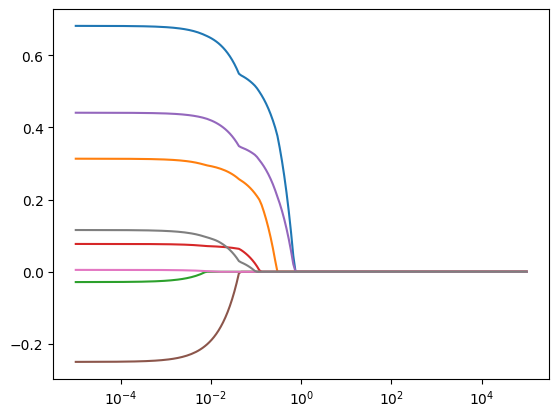

In [32]:
from sklearn.linear_model import Lasso  
    
# This is an example of possible values for the lambda that you can consider.
lambdas = np.logspace(-5, 5, 200)

coefs = []
for l in lambdas:
    model = Lasso(alpha=l)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
plt.figure()
plt.plot(lambdas, coefs)
plt.xscale("log")
plt.show()

Coefficients seem to shrink to zero much faster than in ridge regresison. Additionally, no oscillation occurs as lambda increases, instead the features seem to be discarded in succession.

## 5. Cross Validation & Lasso
Perform 10-fold cross-validation on the training set to determine the optimal value for $\lambda$ in the Lasso.
		Report train and test error measured in MSE for this $\lambda$. 

In [37]:
folds = 10

kf = KFold(n_splits=folds)
errors = []
for l in lambdas:
    model = Lasso(alpha=l)
    error = 0
    for train_index, test_index in kf.split(Xtrain):
        Xtrain_k, ytrain_k = Xtrain.iloc[train_index,:], ytrain.iloc[train_index]
        Xtest_k, ytest_k = Xtrain.iloc[test_index, :], ytrain.iloc[test_index]
        model.fit(Xtrain_k, ytrain_k)
        error += np.linalg.norm(ytest_k - model.predict(Xtest_k), ord=2)
    errors.append(error/folds)
best_idx = np.argmin(errors)
best_error = errors[best_idx]
best_lambda = lambdas[best_idx]
lasso_model = Lasso(alpha = best_lambda)
lasso_model.fit(Xtrain, ytrain)
test_mse = np.linalg.norm(ytest - lasso_model.predict(Xtest), ord=2)
print(f"Best lambda value = {best_lambda}")
print(f"Training error = {best_error}")
print(f"Testing error = {test_mse}")

Best lambda value = 0.05872786613189483
Training error = 2.146450446110321
Testing error = 3.5998648471198056


How many and which features are used?
		Compare this to the coefficients determined for ridge regression in part 3 of this exercise.

In [45]:
lasso_count = sum(lasso_model.coef_ != 0)
ridge_count = sum(ridge_model.coef_ != 0)
print(f"Lasso regression uses {lasso_count} features, Ridge regression uses {ridge_count} features")

Lasso regression uses 5 features, Ridge regression uses 8 features


The lasso regression model only uses 5 of the 8 features, while the ridge regression model uses all 8 features.

## 6. 

Compare the performance, in terms of MSE, of the best models in parts 3. and 5. Which model would you choose and why? What alternative model could have been used?

The performance in terms of MSE is very similar between the two models. In this case, the lasso model 